<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!</b>

Меня зовут Дмитрий Михаленко, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

Ниже в работе ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**.
    
Для наглядности я буду использовать цветовую разметку:
<font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге может стать еще лучше, если внести небольшие коррективы.
Но настаивать я не буду.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
Для правильного решения задачи на этом шаге необходимо внести правки. Напоминаю, что проект не может быть принят, без их отработки.
</div>

Для продуктивной работы прошу: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом**
Мне будет легче отследить изменения, если ты тоже выделишь свои комментарии:
    
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
        
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

# Принятие решений в бизнесе

**Описание проекта**

Мы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

**Описание данных**

**Данные для первой части**

Файл `/datasets/hypothesis.csv`.
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

**Данные для второй части**

Файл `/datasets/orders.csv`.
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


Файл `/datasets/visitors.csv`.
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Цель проекта**

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Замечательное введение! Есть цель, исходные данные и план работы.

## Часть. Приоритизация гипотез.
В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

- Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

In [1]:
import pandas as pd # импортируем библиотеки
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() 

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'), # 9 гипотез
    pd.read_csv('/datasets/orders.csv'), # заказы
    pd.read_csv('/datasets/visitors.csv'), # посетители
)

display(hypothesis)
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [3]:
# приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

In [4]:
# добавим к двум столбцам датафрейма orders нижнее подчеркивание
orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'}, inplace=True)

In [5]:
# преобразуем данные о времени
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [6]:
# ищем пропуски
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [7]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [8]:
# ищем дубликаты
orders.duplicated().sum()

0

In [9]:
visitors.duplicated().sum()

0

In [10]:
# ищем неявные дубликаты
orders[orders.duplicated(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'])].count()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [11]:
visitors[visitors.duplicated(['date', 'group', 'visitors'])].count()

date        0
group       0
visitors    0
dtype: int64

In [12]:
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame

Вывод:
- датафрейм `hypothesis` содержит 9 записей, `orders` - 1197, `visitors` - 62
- провели предобработку данных(привели названия столбцов к нижнему регистру, разделили названия с id двух столбцов нижним подчеркиванием)
- изменили тип столбцов, содержащие дату
- пропусков, явных и неявных дубликатов нет.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Последовательная и качественная предобработка исходных датафреймов, молодец!

**Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [13]:
# устанавливаем None для отображения полной ширины
pd.set_option('display.max_colwidth', None)

In [14]:
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Вывод: 8 гипотеза "Запустить акцию, дающую скидку на товар в день рождения" набрала больше всего баллов:
- высокие значения параметров `impact` и `confidence` говорят нам с уверенностью о том, что такое изменение сильно повлияет на пользователей и их удовлетворение, ведь люди любят получать подарки
- параметр `efforts` показывает, что такое изменение стоит средних затрат, то есть не сильно дорого и не дешево. Возможно затраты пойдут на рекламу или рассылки.

**Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [15]:
hypothesis['rice_score'] = round((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)
hypothesis.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Вывод: 7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" набрала больше всего баллов, так как сильно повлияет на пользователей, об этом говорит параметр `reach`. Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" теперь стоит на 5 месте, так как это изменение повлияет на минимальное количество пользователей (день рождения пользователя всего раз в году), в отличие от 7 гипотезы, которая предполагает отправлять рассылки всем пользователям, оставившим на сайте свои данные.

Эти две гипотезы имеют схожий параметр `efforts`, означающий средние затраты, то есть добавление формы вполне позволительно для интернет-магазина.

**Вывод по 1 части. Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.**

Поработав с приоритизацией гипотез, мы выяснили, что, если необходимо внести изменение, которое повлияет в большинстве своем на охват пользователей, то для проверки подойдет фреймворк `RICE`. Если количество пользователей особо не важно, то для оценки можно применить `ICE`. 

На данный момент нам необходимо увеличить выручку от пользователей, поэтому в приоритете тестирования у нас будет 7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Молодец, что отобразила названия гипотез целтком и сделала приоритезацию через названия, а не только их номера. При таком методе разночтение данных исключено.
    
Фреймворки посчитаны верно и причина различий "reach" в них определена!

## Часть. Анализ A/B-теста

**Задача**

**Проанализируйте A/B-тест**

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
        'date' : 'max', 
        'group' : 'max', 
        'transaction_id' : 'nunique', 
        'visitor_id' : 'nunique', 
        'revenue' : 'sum'
    }
    ), 
    axis=1
).sort_values(by=['date','group'])

# аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'
    }
    ), 
    axis=1
).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Уникальные пары сформированы, получены агрегированные данные

Построим график кумулятивной выручки по дням и группам A/B-тестирования:

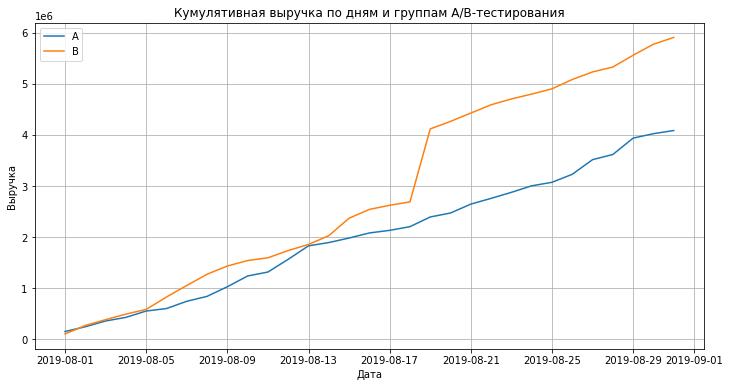

In [17]:
plt.figure(figsize=(12,6))
plt.grid()

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Вывод: Как мы видим, выручка только растет, группа B лидирует с большим отрывом в конце месяца. 18-19 августа в группе B произошел резкий скачок выручки, это может говорить о том, что в эти дни были дорогие заказы или всплеск числа заказов.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все верно, молодец, что предположила причину появления аномалии

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

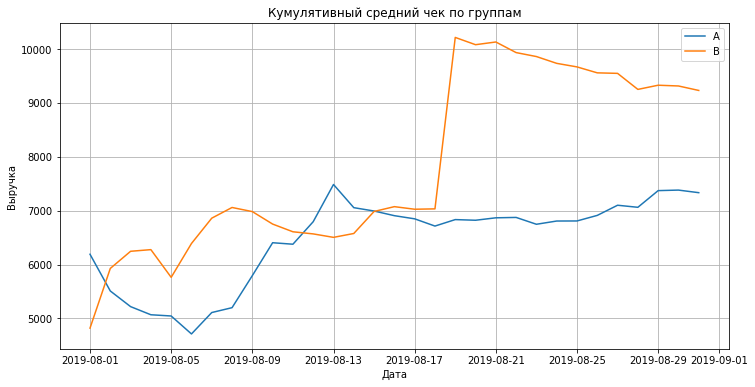

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.legend()
plt.grid()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Вывод: По графику мы можем наблюдать скачки роста и падения среднего чека у обеих групп, но бросается в глаза взлет выручки группы B 18-19 августа. В конце графика средний чек группы B стал снижаться, а у группы A, наоборот, расти.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Действительно, тут влияние выбросов также очевидно и следует рассмотреть их подробнее

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [19]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

merged_cumulative_revenue.head()

,date,revenue_a,orders_a,revenue_b,orders_b
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим график:

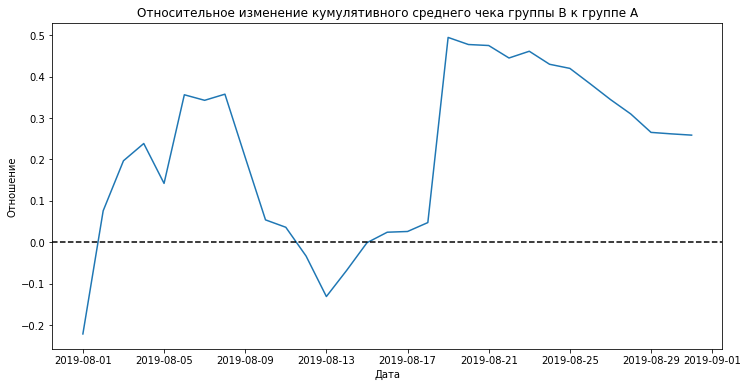

In [20]:
# зададим параметры графика
plt.figure(figsize=(12, 6))

# cтроим отношение средних чеков
plt.plot(
    merged_cumulative_revenue['date'], 
    (merged_cumulative_revenue['revenue_b']/
     merged_cumulative_revenue['orders_b'])/
    (merged_cumulative_revenue['revenue_a']/
     merged_cumulative_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.show()

Вывод: Наблюдаются резкие скачки в графике, вероятно, в группе есть очень дорогие заказы или выбросы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Полностью согласен с тобой

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

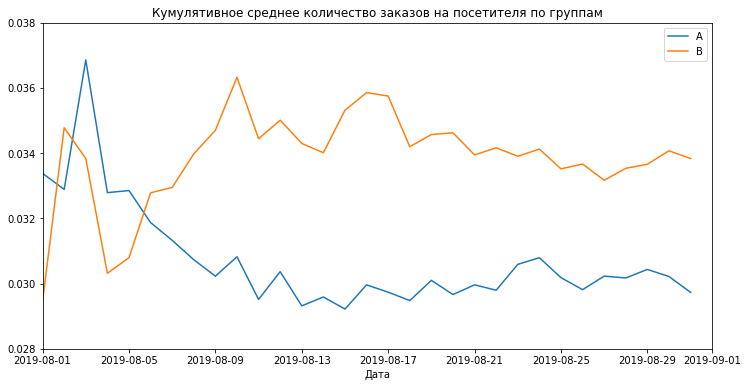

In [21]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# зададим параметры графика
plt.figure(figsize=(12, 6))

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0.028, 0.038])

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.show()

Вывод: В начале графика мы видим, что конверсия группы B (0.029) была ниже группы A (0.033), затем наблюдается резкий рост и такое же падение (вероятно, были дорогие заказы как единичные случаи), но конверсия группы A продолжала падать, а у группы B стала расти и на протяжении всего графика держалась выше группы A. После 29 августа конверсия обеих групп начала снижаться.
Группа A достигла пика в 0.037, группа B - 0.036.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Тренды графика описаны верно!

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

(18109.0, 18140.0, -0.2, 0.3)

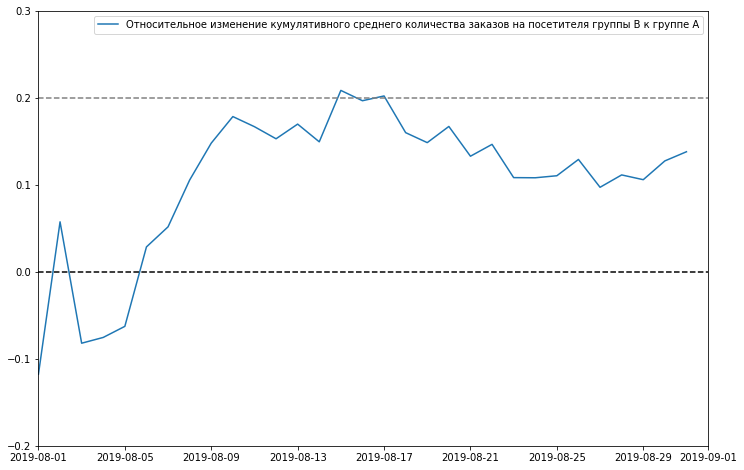

In [22]:
# объединим таблицы
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], 
    left_on='date', right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# зададим параметры графика
plt.figure(figsize=(12, 8))

# строим график
plt.plot(
    merged_cumulative_conversions['date'], 
    merged_cumulative_conversions['conversion_b']/
    merged_cumulative_conversions['conversion_a']
    -1,
    label="Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A"
)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])

Вывод: В начале графика мы видим, что группа B была значительно ниже группы A, затем резкий скачок вверх и снова спад, но потом группа B стремительно росла и держалась на протяжении нескольких дней, затем снова снижение и подъем. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Да, но на выбранном горизонте анализа закончили мы восходищим трендом

<div class="alert alert-info"> <b>Комментарий студента:</b> Подправила.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Замечательно

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [23]:
# построим сводную таблицу и подсчитаем количество заказов по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

# зададим названия столбцам
orders_by_users.columns = ['user_id', 'orders']

# посмотрим на результат
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим график:

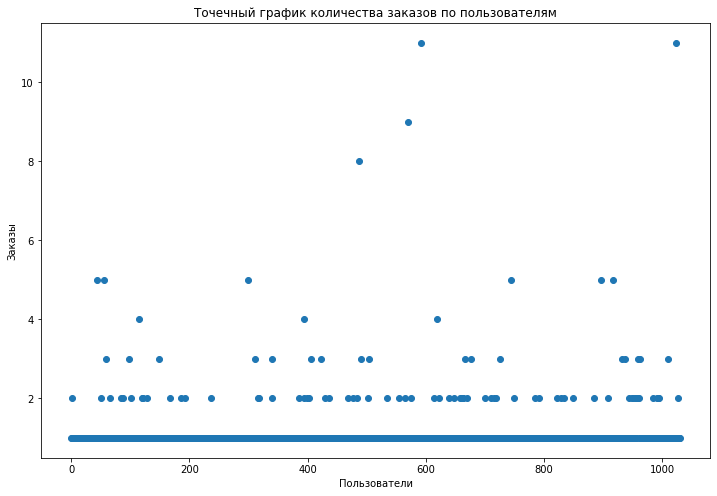

In [24]:
x_values = pd.Series(range(0,len(orders_by_users)))

# зададим параметры графика
plt.figure(figsize=(12, 8))

# строим точечный график
plt.scatter(x_values, orders_by_users['orders'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.show()

Вывод: В основном пользователи совершают 1-2 заказа, намного реже больше 2. Как мы видим на графике есть выбросы - несколько пользователей совершили свыше 10 заказов.

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [25]:
display(np.percentile(orders_by_users['orders'], [95, 99]))

array([2., 4.])

Вывод: 
- не больше 5% пользователей совершили более 2 заказов
- не больше 1% пользователей совершили более 4 заказов.

In [26]:
# граница для определения аномальных пользователей - 3
user_boarder = 3

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Логичный выбор границы фильтрации

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

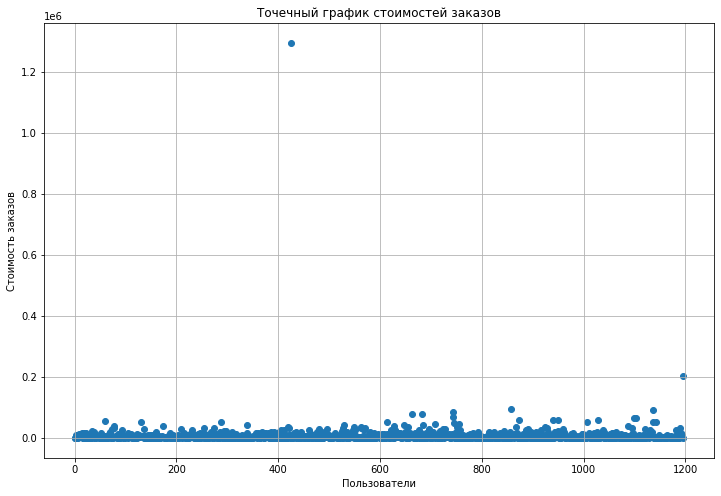

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# зададим параметры графика
plt.figure(figsize=(12, 8))

# строим точечный график
plt.scatter(x_values, orders['revenue'])

plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

Вывод: по графику мы видим, что выбиваются два значения - 200 000 и выше 1 млн.

Построим график без аномальных значений

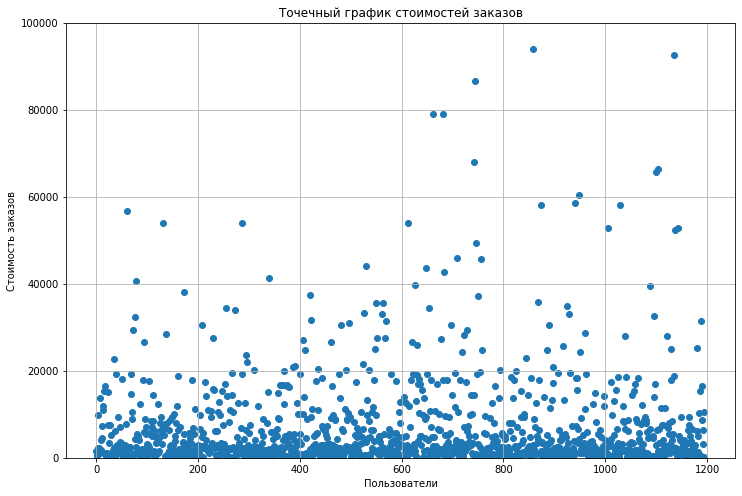

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# зададим параметры графика
plt.figure(figsize=(12, 8))

# строим точечный график
plt.scatter(x_values, orders['revenue'])

# убираем аномальные значения
plt.ylim(0, 100000) 

plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

Вывод: Зачастую пользователи совершают покупку на сумму не превышающую 20 000.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [29]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Вывод:
- не больше 5% пользователей совершает покупку более 28 000 руб.
- не больше 1% пользователей совершает покупку более 58 000 руб.

In [30]:
# граница для определения аномальных заказов - 30 000 рублей
order_boarder = 30000

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> И по стоимости заказов тоже!
    

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Создадим переменные `orders_by_users_a` и `orders_by_users_b` со столбцами `['visitors_id', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [31]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitors_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitors_id', 'orders']

display(orders_by_users_a.head()) 
display(orders_by_users_b.head()) 

,visitors_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitors_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [32]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы:
- H0: различий в среднем количестве заказов между группами нет
- H1: различия в среднем между группами есть

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы
    

In [33]:
results_1 = stats.mannwhitneyu(sample_a, sample_b)[1]
# зададим значение aplha
alpha = 0.05

# выведем значение p-value
display(f'Значение p-value : {results_1}')

if results_1 < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

# выведем отношение конверсии В к А
display('Отношение конверсии В к А: {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

'Значение p-value : 0.016792355056752608'

'Отвергаем нулевую гипотезу'

'Отношение конверсии В к А: 0.138'

Вывод: Отвергаем нулевую гипотезу, так как различия в среднем между группами есть.
Относительный прирост группы B равен 13.8%.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Все верно

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформулируем гипотезы:
- H0: различий в среднем количестве заказов между группами нет
- H1: различия в среднем между группами есть

In [34]:
results_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
# зададим значение aplha
alpha = 0.05

# выведем значение p-value
display(f'Значение p-value : {results_2}')

if results_2 < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

display('Средний чек группы A: {0:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
display('Средний чек группы B: {0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))
display('Отношение средних чеков группы B к A: {0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()))

'Значение p-value : 0.7292909855432458'

'Не получилось отвергнуть нулевую гипотезу'

'Средний чек группы A: 7333.58'

'Средний чек группы B: 9230.88'

'Отношение средних чеков группы B к A: 1.26'

Вывод: Не получилось отвергнуть нулевую гипотезу, так как статистической значимости в среднем чеке заказа между группами нет, хотя разница общего среднего между ними составила 26%.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Тут кажется закралась опечатка в третей F-строке

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично)

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Примем за аномальных пользователей тех, кто совершил от 3 заказов  или совершил заказ дороже 30 000 рублей. 
- user_boarder = 3
- order_boarder = 30000

In [35]:
# сделаем срезы пользователей с числом заказов больше 3
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > user_boarder]['visitors_id'],
        orders_by_users_b[orders_by_users_b['orders'] > user_boarder]['visitors_id'],
    ],
    axis=0,
)

# сделаем срезы пользователей, совершивших заказы дороже 30 000
users_with_expensive_orders = orders[orders['revenue'] > order_boarder]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormal_users.head(5))
display(abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

57

Вывод: Всего аномальных пользователей - 57.

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
# отфильтруем данные в группе A
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# отфильтруем данные в группе B
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitors_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:



In [37]:
results_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]
# зададим значение aplha
alpha = 0.05

# выведем значение p-value
display(f'Значение p-value : {results_3}')

if results_3 < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

# выведем отношение конверсии В к А
display('Отношение очищенной конверсии В к А: {0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

'Значение p-value : 0.01831750089424907'

'Отвергаем нулевую гипотезу'

'Отношение очищенной конверсии В к А: 0.148'

Вывод: Так же отвергаем нулевую гипотезу. Результаты по среднему количеству заказов практически не изменились. 

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [38]:
results_4 = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]

# считаем средние значения
mean_revenue_b = orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()

mean_revenue_a = orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
    
# зададим значение aplha
alpha = 0.05

# выведем значение p-value
display(f'Значение p-value : {results_4}')

if results_4 < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

display('Средний очищенный чек группы A: {0:.2f}'.format(mean_revenue_a))
display('Средний очищенный чек группы B: {0:.2f}'.format(mean_revenue_b))
display('Отношение очищенной конверсии группы B к группе A: {0:.2f}'.format(mean_revenue_b / mean_revenue_a))

'Значение p-value : 0.9583231483662625'

'Не получилось отвергнуть нулевую гипотезу'

'Средний очищенный чек группы A: 5333.29'

'Средний очищенный чек группы B: 5228.22'

'Отношение очищенной конверсии группы B к группе A: 0.98'

Вывод: значение p-value равно 0.958. Это означает, что мы не можем отвергнуть нулевую гипотезу, то есть разницы между группами нет.

Вот что мы узнали:

- Средний чек в группе А (очищенные данные) составляет 5333.29.

- Средний чек в группе В (очищенные данные) составляет 5228.22.

- Отношение среднего чека группы В к группе А равно 0.98.

Это значит, что средние чеки обеих групп почти одинаковы и очень близки друг к другу.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решения по "очищенным" данным верные. И тут без опечаток)

14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Можно остановить тест, так как мы видим, что внесение изменения повлекло положительный результат. Мы это увидели на примере группы B.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Алина, я не совсем согласен с решением по тесту. Ты получила устойчивый рост графиков группы В и наличие статистически значимых различий в конверсии как по сырым, так и очищенным данным....
    
Получается, что тест оказался успешным и есть обоснованное расчетами идея повышения показателей

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила решение и общий вывод</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Теперь интерпретация результатов теста абсолютно верна

# Выводы

В ходе анализа данных крупного интернет-магазина были выполнены следующие шаги:
###### Часть 1. Приоритизация гипотез.
- Подготовка и предобработка данных:
    - датафрейм `hypothesis` содержит 9 записей, `orders` - 1197, `visitors` - 62
    - провели предобработку данных(привели названия столбцов к нижнему регистру, разделили названия с id двух столбцов нижним подчеркиванием)
    - изменили тип столбцов, содержащие дату
    - пропусков, явных и неявных дубликатов нет.

Поработав с приоритизацией гипотез, мы выяснили, что, если необходимо внести изменение, которое повлияет в большинстве своем на охват пользователей, то для проверки подойдет фреймворк `RICE`. Если количество пользователей особо не важно, то для оценки можно применить `ICE`. 

На данный момент нам необходимо увеличить выручку от пользователей, поэтому в приоритете тестирования у нас будет 7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

###### Часть 2. Анализ A/B-теста
Выводы по заданиям 2 части:
1. Как мы видим, выручка только растет, группа B лидирует с большим отрывом в конце месяца. 18-19 августа в группе B произошел резкий скачок выручки, это может говорить о том, что в эти дни были дорогие заказы или всплеск числа заказов.
2. По графику мы можем наблюдать скачки роста и падения среднего чека у обеих групп, но бросается в глаза взлет выручки группы B 18-19 августа. В конце графика средний чек группы B стал снижаться, а у группы A, наоборот, расти.
3. Наблюдаются резкие скачки в графике, вероятно, в группе есть очень дорогие заказы или выбросы.
4. В начале графика мы видим, что конверсия группы B (0.029) была ниже группы A (0.033), затем наблюдается резкий рост и такое же падение (вероятно, были дорогие заказы как единичные случаи), но конверсия группы A продолжала падать, а у группы B стала расти и на протяжении всего графика держалась выше группы A. После 29 августа конверсия обеих групп начала снижаться. Группа A достигла пика в 0.037, группа B - 0.036.
5. В начале графика мы видим, что группа B была значительно ниже группы A, затем резкий скачок вверх и снова спад, но потом группа B стремительно росла и держалась на протяжении нескольких дней, затем снова снижение и подъем.
6. В основном пользователи совершают 1-2 заказа, намного реже больше 2. Как мы видим на графике есть выбросы - несколько пользователей совершили свыше 10 заказов.
7. 
- не больше 5% пользователей совершили более 2 заказов
- не больше 1% пользователей совершили более 4 заказов.
8. Зачастую пользователи совершают покупку на сумму не превышающую 20 000.
9. 
- не больше 5% пользователей совершает покупку более 28 000 руб.
- не больше 1% пользователей совершает покупку более 58 000 руб.
10. Отвергаем нулевую гипотезу, так как различия в среднем между группами есть. Относительный прирост группы B равен 13.8%.
11. Не получилось отвергнуть нулевую гипотезу, так как статистической значимости в среднем чеке заказа между группами нет, хотя разница общего среднего между ними составила 26%.
12. Так же отвергаем нулевую гипотезу. Результаты по среднему количеству заказов практически не изменились. 
13. Значение p-value равно 0.958. Это означает, что мы не можем отвергнуть нулевую гипотезу, то есть разницы между группами нет.
- Средний чек в группе А (очищенные данные) составляет 5333.29.
- Средний чек в группе В (очищенные данные) составляет 5228.22.
- Отношение среднего чека группы В к группе А равно 0.98.
Это значит, что средние чеки обеих групп почти одинаковы и очень близки друг к другу.
14. Можно остановить тест, так как мы видим, что внесение изменения повлекло положительный результат. Мы это увидели на примере группы B.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Алина, проект получился отличный! У тебя очень сильные аналитические навыки и владение инструментами для проведения исследования. Итоговый вывод полностью отражает все этары твоей работы

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
     Алина, спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты  молодец! Но у меня осталось несколько не больших дополнений с которыми проект станет еще лучше.
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Подробные и логичные выводы.
    
    3. Отличные визуализации
    
    
**На что стоит обратить внимание**:
       
    1. Небольшая доработка выводов в А/В тестировании
    
    
**Удачи и жду твой проект на повторное ревью!**
    
    

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Алина, сспасибо за качественную отработку моих дополнений и хорошую обратную связь

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера V2**:
     Молодец! Недочеты исправлены, проект зачтен, поздравляю тебя и увидимся в практикуме!   
